In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [183]:
df = pd.read_csv('/content/marketing_campaign.csv',sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# **EDA**

In [184]:
df.shape

(2240, 29)

In [185]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [186]:
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [187]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')

In [188]:
#عدد ال uniqe في كل قيمه
df.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


In [189]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [190]:
# df.isna().sum()
df.isna().sum()[df.isna().sum()> 0]

,0
Income,24


In [191]:
obj_cols = df.select_dtypes(include=['object']).columns
obj_cols

Index(['Education', 'Marital_Status'], dtype='object')

In [192]:
df = df.drop(columns=["ID", "Z_CostContact", "Z_Revenue"], axis=1)

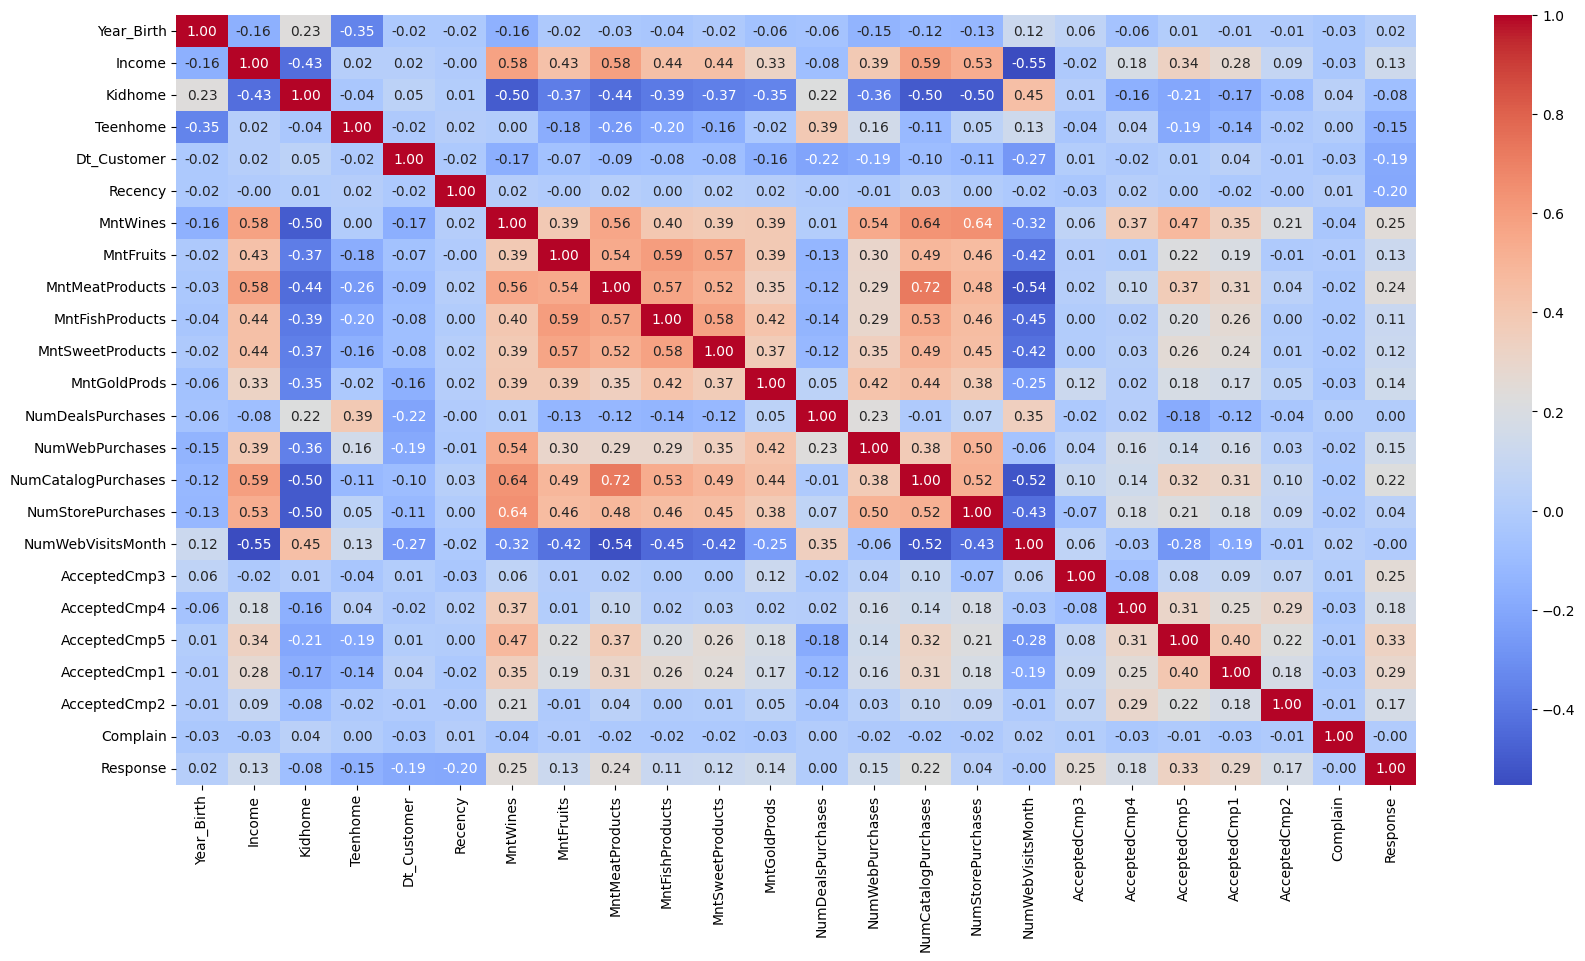

In [193]:
plt.figure(figsize=(20,10))
sns.heatmap(df.drop(columns=obj_cols, axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Preprocessing

In [194]:
# ['Education', 'Marital_Status']
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [195]:
indexNames = df[df["Marital_Status"] == "Absurd"].index
# Delete these row indexes from dataFrame
df.drop(indexNames, inplace=True)
indexNames = df[df["Marital_Status"] == "YOLO"].index
# Delete these row indexes from dataFrame
df.drop(indexNames, inplace=True)

In [196]:
df['Marital_Status'] = df['Marital_Status'].replace("Alone", "Single")

In [197]:
# ['Education', 'Marital_Status']
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,483
Divorced,232
Widow,77


In [198]:
df = df.join(pd.get_dummies(df['Marital_Status'], prefix='Marital'))
df = df.join(pd.get_dummies(df['Education'], prefix='Education'))
df.drop(columns=["Marital_Status", "Education"], axis=1, inplace=True)

In [199]:
df['Income'] = df['Income'].fillna(value=df['Income'].mean())

In [200]:
df.isna().sum()

,0
Year_Birth,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0


In [201]:

scaler = StandardScaler()

In [202]:
df_scaled = scaler.fit_transform(df.drop(columns='Dt_Customer', axis=1))


In [203]:
df_new = pd.DataFrame(df_scaled, columns=df.drop(columns='Dt_Customer', axis=1).columns)
df_new.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,-0.984854,0.235783,-0.826459,-0.929785,0.305815,0.983151,1.552834,1.679346,2.473052,1.475323,...,-0.340248,-0.793560,1.905098,-0.591812,-0.188851,-0.315994,-0.157315,0.992870,-0.444571,-0.525600
1,-1.235315,-0.235105,1.030790,0.906787,-0.385069,-0.869573,-0.635710,-0.712913,-0.650537,-0.631638,...,-0.340248,-0.793560,1.905098,-0.591812,-0.188851,-0.315994,-0.157315,0.992870,-0.444571,-0.525600
2,-0.316959,0.773788,-0.826459,-0.929785,-0.799600,0.362607,0.571763,-0.176870,1.352235,-0.147279,...,-0.340248,-0.793560,-0.524907,1.689726,-0.188851,-0.315994,-0.157315,0.992870,-0.444571,-0.525600
3,1.269292,-1.021570,1.030790,-0.929785,-0.799600,-0.869573,-0.560242,-0.650891,-0.503544,-0.583202,...,-0.340248,-0.793560,-0.524907,1.689726,-0.188851,-0.315994,-0.157315,0.992870,-0.444571,-0.525600
4,1.018832,0.241972,1.030790,-0.929785,1.549407,-0.388577,0.420829,-0.216741,0.157922,-0.001971,...,-0.340248,1.260144,-0.524907,-0.591812,-0.188851,-0.315994,-0.157315,-1.007181,-0.444571,1.902586


In [204]:
df_new.isna().sum()

,0
Year_Birth,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0


In [205]:
df_new.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
count,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2236.000000,2.236000e+03,...,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03,2.236000e+03
mean,8.881784e-16,1.461761e-16,-9.056560e-17,4.448836e-17,1.104265e-16,-1.747757e-17,1.588870e-17,6.991029e-17,0.000000,2.859966e-17,...,3.574958e-17,2.542192e-17,7.944351e-18,3.574958e-17,5.878820e-17,2.939410e-17,2.542192e-17,-9.374334e-17,-7.944351e-18,4.448836e-17
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224,1.000224e+00,...,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00
min,-6.328017e+00,-2.016370e+00,-8.264590e-01,-9.297849e-01,-1.697749e+00,-9.022332e-01,-6.608652e-01,-7.394934e-01,-0.687285,-6.558556e-01,...,-3.402476e-01,-7.935601e-01,-5.249073e-01,-5.918121e-01,-1.888509e-01,-3.159944e-01,-1.573148e-01,-1.007181e+00,-4.445709e-01,-5.256003e-01
25%,-8.178806e-01,-6.679646e-01,-8.264590e-01,-9.297849e-01,-8.686882e-01,-8.339437e-01,-6.357095e-01,-6.686117e-01,-0.632163,-6.316376e-01,...,-3.402476e-01,-7.935601e-01,-5.249073e-01,-5.918121e-01,-1.888509e-01,-3.159944e-01,-1.573148e-01,-1.007181e+00,-4.445709e-01,-5.256003e-01
50%,1.004755e-01,-1.960416e-02,-8.264590e-01,-9.297849e-01,-5.082758e-03,-3.885774e-01,-4.596198e-01,-4.426761e-01,-0.466796,-4.621121e-01,...,-3.402476e-01,-7.935601e-01,-5.249073e-01,-5.918121e-01,-1.888509e-01,-3.159944e-01,-1.573148e-01,9.928698e-01,-4.445709e-01,-5.256003e-01
75%,6.848840e-01,6.411034e-01,1.030790e+00,9.067867e-01,8.585227e-01,5.971666e-01,1.692720e-01,2.882919e-01,0.231418,1.433364e-01,...,-3.402476e-01,1.260144e+00,-5.249073e-01,1.689726e+00,-1.888509e-01,-3.159944e-01,-1.573148e-01,9.928698e-01,-4.445709e-01,-5.256003e-01
max,2.271135e+00,2.453195e+01,2.888038e+00,2.743358e+00,1.722128e+00,3.530646e+00,4.345114e+00,6.902445e+00,4.071595,5.713462e+00,...,2.939036e+00,1.260144e+00,1.905098e+00,1.689726e+00,5.295183e+00,3.164613e+00,6.356682e+00,9.928698e-01,2.249360e+00,1.902586e+00


## Modeling

In [206]:
wcss = []  # List to store WCSS for each k
k_range = range(1, 11)  # k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_) # inertia_ = WCSS

# Show the values (optional)
for i, w in enumerate(wcss):
    print(f"k={i+1}, WCSS={w:.2f}")

k=1, WCSS=73788.00
k=2, WCSS=62390.23
k=3, WCSS=58738.01
k=4, WCSS=56167.80
k=5, WCSS=54102.54
k=6, WCSS=52515.11
k=7, WCSS=50017.46
k=8, WCSS=49447.60
k=9, WCSS=47550.04
k=10, WCSS=46415.63


In [207]:
wcss

[73788.00000000004,
 62390.23020229721,
 58738.00780899124,
 56167.79850028951,
 54102.53789140501,
 52515.108487975136,
 50017.46341231264,
 49447.601712261014,
 47550.03750718745,
 46415.63312931998]

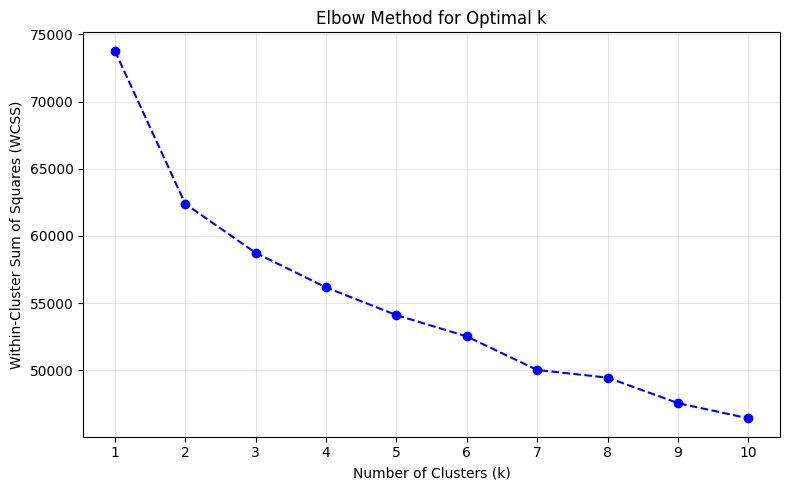

In [208]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [209]:
best_k = 2
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = kmeans_final.fit_predict(df_scaled)

# Optional: Add cluster centers back (in original scale)
centers_scaled = kmeans_final.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

# Create a nice DataFrame for centers
centers_df = pd.DataFrame(centers_original, columns=df_new.columns)
print("\nCluster Centers (in original scale):")
print(centers_df.round(2))


Cluster Centers (in original scale):
   Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     1967.06  72131.18     0.07      0.43    49.54    606.72      56.34   
1     1969.93  39246.17     0.69      0.56    48.89    106.23       6.65   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Marital_Divorced  \
0           364.63            79.67             58.10  ...              0.11   
1            37.90             9.82              6.84  ...              0.10   

   Marital_Married  Marital_Single  Marital_Together  Marital_Widow  \
0             0.37            0.22              0.26           0.05   
1             0.40            0.22              0.26           0.03   

   Education_2n Cycle  Education_Basic  Education_Graduation  \
0                0.08             0.00                  0.54   
1                0.10             0.04                  0.48   

   Education_Master  Education_PhD  
0              0.15           0.23  
1          

In [210]:
centers_original

array([[1.96705889e+03, 7.21311756e+04, 6.56851642e-02, 4.25821065e-01,
        4.95424689e+01, 6.06718007e+02, 5.63397508e+01, 3.64627407e+02,
        7.96693092e+01, 5.80985277e+01, 7.62921857e+01, 1.99320498e+00,
        5.79954700e+00, 5.35220838e+00, 8.56172140e+00, 3.67270668e+00,
        8.15402039e-02, 1.32502831e-01, 1.83465459e-01, 1.54020385e-01,
        3.17100793e-02, 7.92751982e-03, 2.33295583e-01, 1.13250283e-01,
        3.68063420e-01, 2.15175538e-01, 2.58210646e-01, 4.53001133e-02,
        8.26727067e-02, 1.13250283e-03, 5.35673839e-01, 1.47225368e-01,
        2.33295583e-01],
       [1.96993052e+03, 3.92461686e+04, 6.92535107e-01, 5.58758315e-01,
        4.88891353e+01, 1.06229860e+02, 6.64745011e+00, 3.78987435e+01,
        9.82261641e+00, 6.83887657e+00, 2.27280118e+01, 2.53806356e+00,
        2.96230599e+00, 9.01699926e-01, 3.98004435e+00, 6.39098300e+00,
        6.72579453e-02, 3.69549150e-02, 2.27595720e-15, 5.17368810e-03,
        1.47819660e-03, 1.03473762e-02,